### KNN-Klassifikation

K-Nearest-Neighbor-Algorithmus (KNN, zu Deutsch „k-nächste-Nachbarn-Algorithmus“) ist ein Klassifikationsverfahren, bei dem eine Klassenzuordnung unter Berücksichtigung seiner k nächsten Nachbarn vorgenommen wird. Der Teil des Lernens besteht aus simplem Abspeichern der Trainingsbeispiele, was auch als _lazy learning_ („träges Lernen“) bezeichnet wird. Eine Datennormalisierung kann die Genauigkeit dieses Algorithmus erhöhen.

Im folgenden Beispiel haben wir zwei Klassen von Objekten: A und B. Wir wollen herausfinden, zu welcher Klasse das Sternchen gehört.

<img src='https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png' width='300px;'>

### KNN Algorithmus

Dabei wird das Modell einfach die nächsten unmittelbaren Nachbarn des Sternchen beobachten. 
`k` ist die Anzahl der Datenpunkte in der unmittelbaren Nachbarschaft des Sternchens.
Nehmen wir `k=3` an, wird das Sternchen zu Klasse B zugeordnet, denn, aus 3 nächsten benachbarten Punkten, gehören 2 zur Klasse B. Also, weil die Mehrheit von drei Nachbarn Klasse B gehören, dann gehört auch der Stern sehr wohl dazu.  

Wenn wir die Nachbarschaft etwas erweitern, also `k=6`, dann sehen wir, dass unter 6 unmittelbaren benachbarten Datenpunkten 4 zur Klasse A und 2 zur Klasse B gehören. Also der Stern wird diesmal zur Klasse A zugeordnet.

### Kundenklassifiezierung mit KNN

Für diese Aufgabe haben wir einige Kunden-Informationen eines Telekommunikationsunternehmens in einer csv Datei gespeichert: `teleCust.csv` Das Ziel ist, einen Algorithmus, bzw. ein Modell zu finden, die die Datenverteilung (Zugehörigkeit von Kunden zu den jeweilgen Kategorien) anhand der Merkmale (Features) am besten beschreiben kann. Dazu werden wir den KNN-Algorithmus einsetzen.  

Als erster Schritt importieren wir notwendige Module und Pakete. Dann wird ein Dataframe erstellt:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('Pakete erfolgreich importiert.')

Pakete erfolgreich importiert.


#### Daten laden und untersuchen
Ein Dataframe erstellen

In [2]:
df = pd.read_csv('teleCust.csv')

Allgemeine Informationen anzeigen lassen:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
df.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [6]:
df.head(3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3


Wie viele Exemplare hat jede Kategorie? (Spalte `custcat`) 

In [9]:
df['custcat'].unique()

array([1, 4, 3, 2])

Welche Korrelationen bestehen zwischen den Attributen, zum Beispiel, welches Verhältnis gibt es zwischen Einkommen `income` und Kundenklasse `custcat`? 

In [11]:
cor_matrix = df.corr()
print(cor_matrix)

           region    tenure       age   marital   address    income        ed  \
region   1.000000  0.016388  0.015034 -0.080637  0.010320  0.023765 -0.057952   
tenure   0.016388  1.000000  0.490217  0.154171  0.522952  0.242912 -0.109797   
age      0.015034  0.490217  1.000000 -0.014433  0.660435  0.327948 -0.154857   
marital -0.080637  0.154171 -0.014433  1.000000 -0.012051 -0.043984  0.001400   
address  0.010320  0.522952  0.660435 -0.012051  1.000000  0.226781 -0.128330   
income   0.023765  0.242912  0.327948 -0.043984  0.226781  1.000000  0.113939   
ed      -0.057952 -0.109797 -0.154857  0.001400 -0.128330  0.113939  1.000000   
employ   0.016335  0.520288  0.670047 -0.002891  0.463291  0.516349 -0.228580   
retire   0.005595  0.171143  0.429440 -0.078109  0.292503 -0.083651 -0.114229   
gender   0.050596  0.023533 -0.011419  0.008345  0.008363  0.038706  0.006704   
reside  -0.065158 -0.036592 -0.254993  0.625999 -0.201645 -0.097591  0.021045   
custcat -0.023771  0.166691 

#### Visualisierung
Gern kann hier ein Diagramm (wie z.B. ein Heatmap) für eine visuelle Darstellung der Korrelationen erstellt werden.

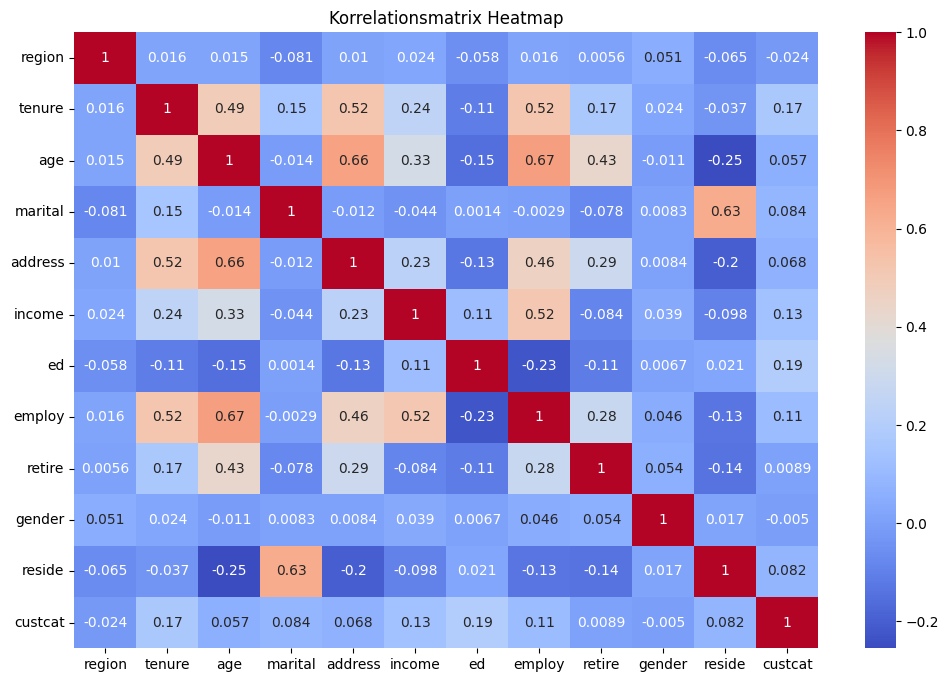

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix Heatmap")
plt.show()

#### Feature selection
Jetzt wollen wir die relevanten Merkmale (_features_) in einem zweidimensionalen Array `X` und das Zielmerkmal Kundenkategorie also `custcat` in einem eindimensionalen Array `y` speichern:

In [62]:
# code
#X = df[['marital', 'income', 'ed', 'employ', 'reside']]
X = df.drop('custcat', axis=1)
y = df['custcat']

#### Daten Standardisieren
Wie bereits erklärt, eine Datennormalisierung kann die Genauigkeit dieses Algorithmus erhöhen. Wir können die Features (Array `X`) _standardisieren_, indem wir den Mittelwert entfernen und die Varianz auf Eins skalieren.

In [63]:
# einfach ausführen
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

#### Training- und Testing-Daten
Und dann die Daten in Train- und Test-Daten unterteilen. Dabei 80% der ganzen Daten als Training-Daten benutzen:

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#### Modellierung
Demnächst erstellen wir ein Modell der Klasse `KNeighborsClassifier`. Dabei setzen wir zuerst die Anzahl der Nachbarschaften (`n_neighbors`) auf 4.

In [90]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k)

Dann trainieren wir das Modell:

In [91]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Im nächsten Schritt ermitteln wir die Genauigkeit des Modells in Train- und Test-Set mit Hilfe der Funktion `accuracy_score`. Dazu muss natürlich vorher das Modell anhand `X_train` und `X_test` Einschätzungen machen.

In [92]:
print("Train-set Genauigkeit: ", knn.score(X_train, y_train))
print("Test-set Genauigkeit: ", knn.score(X_test, y_test))

Train-set Genauigkeit:  0.54375
Test-set Genauigkeit:  0.325


Auch die Funktion `prediction_report` kann hier eingesetzt werden, um die Performance des Modells noch näher zu unersuchen:

In [93]:
y_pred = knn.predict(X_test)
print(f' Klassifikation report\n{classification_report(y_test, y_pred)}')

 Klassifikation report
              precision    recall  f1-score   support

           1       0.37      0.48      0.42        60
           2       0.15      0.13      0.14        39
           3       0.32      0.31      0.31        55
           4       0.40      0.30      0.35        46

    accuracy                           0.33       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.32      0.33      0.32       200



Wir können versuchen, die Performance unseres Modells zu verbessern. Dazu können wir die Anzahl der Nachbarschaften (`n_neighbors`) erhöhen und das Ergebnis mit dem Letzteren vergleichen. Wir versuchen jetzt mit 6 Nachbarschaften:

In [94]:
k = 6
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

`n_neighbors` ist die Anzahl der Nachbarschaften. Aber wie können wir die _optimale_ Zahl finden?
Dazu können wir mit verschiedenen Werten, zum Beispiel 1, 2, .. 10 Modelle trainieren und testen und ihre Genauigkeiten dann vergleichen und das Modell mit dem höchsten Genauigkeitswert finden.

In [95]:
print("Train-set Genauigkeit: ", knn.score(X_train, y_train))
print("Test-set Genauigkeit: ", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print(f' Klassifikation report\n{classification_report(y_test, y_pred)}')

Train-set Genauigkeit:  0.5075
Test-set Genauigkeit:  0.33
 Klassifikation report
              precision    recall  f1-score   support

           1       0.35      0.52      0.42        60
           2       0.26      0.23      0.24        39
           3       0.35      0.31      0.33        55
           4       0.32      0.20      0.24        46

    accuracy                           0.33       200
   macro avg       0.32      0.31      0.31       200
weighted avg       0.33      0.33      0.32       200



In [96]:
k = 8
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
print("Train-set Genauigkeit: ", knn.score(X_train, y_train))
print("Test-set Genauigkeit: ", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print(f' Klassifikation report\n{classification_report(y_test, y_pred)}')

Train-set Genauigkeit:  0.51375
Test-set Genauigkeit:  0.335
 Klassifikation report
              precision    recall  f1-score   support

           1       0.36      0.45      0.40        60
           2       0.22      0.21      0.21        39
           3       0.41      0.44      0.42        55
           4       0.25      0.17      0.21        46

    accuracy                           0.34       200
   macro avg       0.31      0.32      0.31       200
weighted avg       0.32      0.34      0.33       200



In [97]:
k = 2
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
print("Train-set Genauigkeit: ", knn.score(X_train, y_train))
print("Test-set Genauigkeit: ", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print(f' Klassifikation report\n{classification_report(y_test, y_pred)}')

Train-set Genauigkeit:  0.63125
Test-set Genauigkeit:  0.34
 Klassifikation report
              precision    recall  f1-score   support

           1       0.38      0.53      0.44        60
           2       0.22      0.31      0.26        39
           3       0.39      0.35      0.37        55
           4       0.38      0.11      0.17        46

    accuracy                           0.34       200
   macro avg       0.34      0.32      0.31       200
weighted avg       0.35      0.34      0.32       200



Die beste Genauigkeit ermitteln:

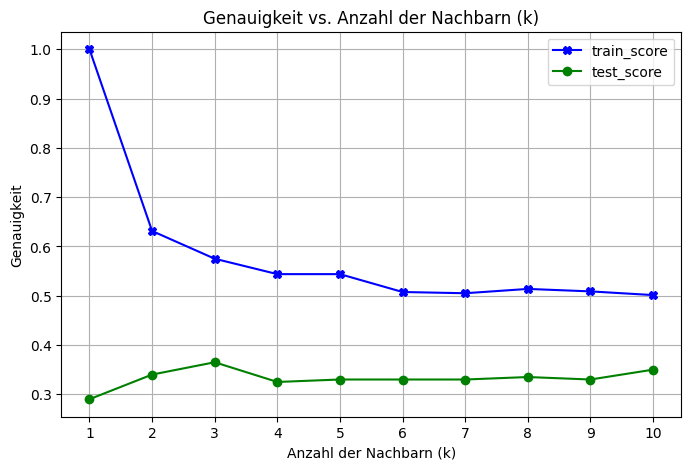

In [98]:
k_varianten = range(1, 11)
genauig_train = []
genauig_test = []
for k in k_varianten:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    genauig_train.append(knn.score(X_train, y_train))
    genauig_test.append(knn.score(X_test, y_test))
    


plt.figure(figsize=(8, 5))
plt.plot(k_varianten, genauig_train, marker='X', linestyle='-', color='b', label= 'train_score')
plt.plot(k_varianten, genauig_test, marker='o', linestyle='-', color='g', label='test_score')
plt.title('Genauigkeit vs. Anzahl der Nachbarn (k)')
plt.xlabel('Anzahl der Nachbarn (k)')
plt.ylabel('Genauigkeit')
plt.xticks(k_varianten)
plt.legend()
plt.grid(True)
plt.show()

Welche weitere Klassifikationsmodelle kämen hier in Frage?

In [109]:
 
best= k_varianten[np.argmax(genauig_test)]
print(f'Die beste Anzahl K ist: {best}')

Die beste Anzahl K ist: 3


In [114]:
ac_best= genauig_test[np.argmax(genauig_test)]
print(f'Die beste Genauigkeit  des Testsets ist {ac_best}')

Die beste Genauigkeit  des Testsets ist 0.365


In [115]:
ac_k= genauig_train[best-1]
print(f'Die Genauigkeit des Trainsets für K= 3 ist {ac_k}')

Die Genauigkeit des Trainsets für K= 3 ist 0.575
